# Leaf Septoria Detection using CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pathlib
import os

In [4]:
base_dir = 'C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\datasetDaunTomat'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [3]:
# Custom function to plot the image
# plot the image
def imshow(img_arr):
    # We want to display multiple images in a single row,
    # Thus, we use subplots
    fig, axes = plt.subplots(1, 5, figsize=(10,10))

    axes = axes.flatten()

    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        
    plt.show()

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,   # Divide the pixel values by 255 to narmalize them
    rotation_range = 30,          # Rotate
    width_shift_range = 0.1,      # shift through the width
    height_shift_range = 0.1,     # shift through the height
    shear_range = 0.1,            # apply shear on the image
    horizontal_flip = True,       # Flip horizontally
    vertical_flip = True,         # Flip vertically
    fill_mode = 'nearest',        # To fill up the pixels cut off during augmentation
    brightness_range = [0.7,1.4]  # To introduce different lighting conditions
)

val_datagen = ImageDataGenerator(rescale = 1/255, rotation_range = 40)


In [7]:
# We used rotation to add just 
# a little more augmentation 
# to get more images for our validation set
train_data = train_datagen.flow_from_directory(train_dir, 
                                           target_size = (150,150),   #Reduce shape of images to 150 X 150
                                           batch_size=32,             # Take 32 images at once and do it on them
                                          class_mode='categorical',
                                           color_mode= 'rgb', 
                                           shuffle= True)

valid_data = val_datagen.flow_from_directory(val_dir,
                                           target_size = (150,150),
                                           batch_size = 32,
                                           class_mode='categorical',
                                           color_mode= 'rgb', 
                                           shuffle= True
                                           )

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [8]:
print(train_data.class_indices)
print(valid_data.class_indices)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


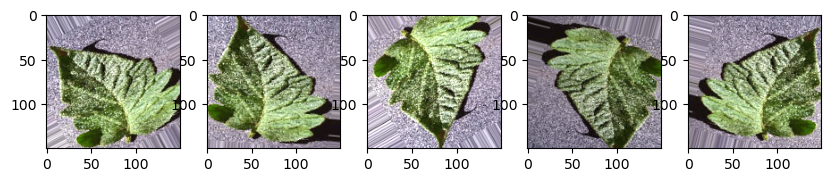

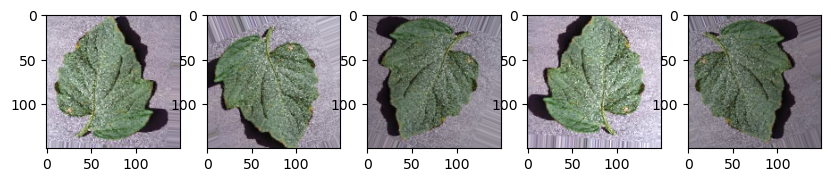

In [9]:
imshow(train_data[0][0][0] for i in range(5))
imshow(train_data[0][0][5] for i in range(5))

In [ ]:
# Just to check if the dataset is balanced or not
y = train_data.classes
count_septoria, count_healthy = 0,0

for x in y:
    if x==0:
        count_healthy += 1
    else:
        count_septoria += 1
print("Septoria:",count_septoria,"   Healthy:",count_healthy)

Septoria: 1571    Healthy: 1476


# Building the CNN

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (4,4), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (4,4), activation='relu'),                           # 3 layer konvolusi
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.4), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),# layer input untuk deep learning neural network

    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(10, activation= 'softmax')    
])

In [33]:
model.compile(optimizer ='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 147, 147, 32)      1568      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 70, 70, 64)        32832     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 35, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       131200    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 128)     

In [35]:
history=model.fit(
      train_data,
      steps_per_epoch=4,                    
      epochs=25,                            
      validation_data=valid_data,       
      verbose=2,
      validation_steps=4             
      )
# Previous tests:
# 1. Epochs = 20 >>> loss: 0.0623 - accuracy: 0.9791 - val_loss: 0.0440 - val_accuracy: 0.9825

# 3. Epochs = 50 >>> loss: 0.0297 - accuracy: 0.9879 - val_loss: 0.0362 - val_accuracy: 0.987

# With only 20 epochs, the model got an accuracy of almost 98% on both training and validation sets

Epoch 1/25
4/4 - 4s - loss: 2.3982 - accuracy: 0.0781 - val_loss: 2.3039 - val_accuracy: 0.0859 - 4s/epoch - 956ms/step
Epoch 2/25
4/4 - 3s - loss: 2.2967 - accuracy: 0.0781 - val_loss: 2.3006 - val_accuracy: 0.0547 - 3s/epoch - 846ms/step
Epoch 3/25
4/4 - 3s - loss: 2.3028 - accuracy: 0.0938 - val_loss: 2.2992 - val_accuracy: 0.0859 - 3s/epoch - 818ms/step
Epoch 4/25
4/4 - 3s - loss: 2.2961 - accuracy: 0.1250 - val_loss: 2.3040 - val_accuracy: 0.0781 - 3s/epoch - 770ms/step
Epoch 5/25
4/4 - 3s - loss: 2.2958 - accuracy: 0.1016 - val_loss: 2.2746 - val_accuracy: 0.1250 - 3s/epoch - 785ms/step
Epoch 6/25
4/4 - 3s - loss: 2.2827 - accuracy: 0.0938 - val_loss: 2.2660 - val_accuracy: 0.1094 - 3s/epoch - 853ms/step
Epoch 7/25
4/4 - 3s - loss: 2.2600 - accuracy: 0.1016 - val_loss: 2.2041 - val_accuracy: 0.2500 - 3s/epoch - 809ms/step
Epoch 8/25
4/4 - 3s - loss: 2.2004 - accuracy: 0.2109 - val_loss: 2.1989 - val_accuracy: 0.1875 - 3s/epoch - 808ms/step
Epoch 9/25
4/4 - 3s - loss: 2.1824 - acc

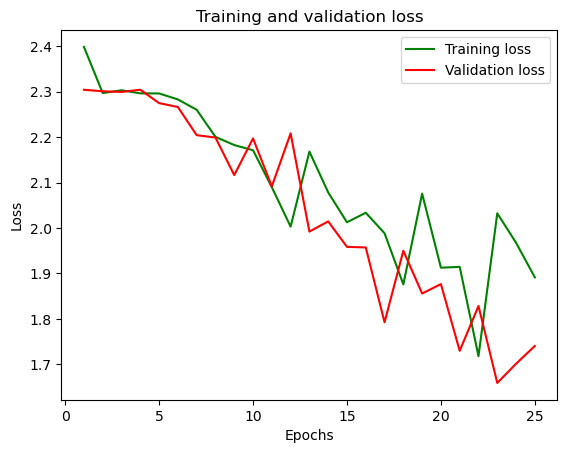

In [36]:
# Loss Curves
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

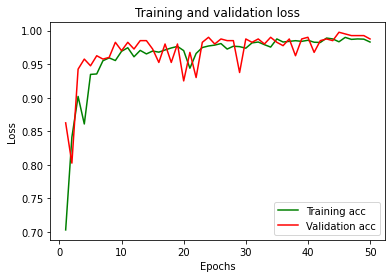

In [ ]:
# Accuracy curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()